# Bias Variance Tradeoff

In this notebook we investigate the bias and variance of models. In the first section we'll investigate fitting functions of the form:

$$f(x) = a + b * x^n$$

to some cubic data with noise.

In [1]:
% matplotlib inline
from __future__ import print_function
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
# from sklearn import datasets, linear_model
import statsmodels.api as sm

## Some helper functions
The following functions will generate data and polynomial values.

In [2]:
def polynomials(X, degree=1):
    # See also numpy.vander
    array = [X]
    y = X
    for i in range(2, int(degree + 1)):
        y = y * X
        array.append(y)
    return np.array(array).transpose()

def monomials(X, degree=1):
    y = np.array(X)
    y = np.power(X, degree)
    return np.array([y]).transpose()

def generate_data(func, a, b, n=100):
    data = []
    for _ in range(n):
        x = random.random() * (b - a)
        y = func(x)
        data.append((x, y))
    return list(sorted(data))

In [3]:
X = np.array(range(10))
polynomials(X, 3)

array([[  0,   0,   0],
       [  1,   1,   1],
       [  2,   4,   8],
       [  3,   9,  27],
       [  4,  16,  64],
       [  5,  25, 125],
       [  6,  36, 216],
       [  7,  49, 343],
       [  8,  64, 512],
       [  9,  81, 729]])

In [4]:
mu, sigma = 0, 0.1 # mean and standard deviation
# norm = np.random.normal(mu, sigma)

# Generate some data
f = lambda x: 4 + 5 * x - 3 * x*x + 0.1 * x * x * x + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2, n=20)

In [5]:
data

[(0.08323323873314425, 4.3705493113100795),
 (0.09631052708990229, 4.187492580867754),
 (0.11004638075581852, 4.6772665170760925),
 (0.5424859481506783, 5.873069215675277),
 (0.5495036326584206, 5.912928406850062),
 (0.8092507180117237, 6.090706992930411),
 (0.83257220888455, 5.994450887129254),
 (0.9065286819650578, 6.208552485303238),
 (0.9503564475845667, 6.061865183778825),
 (1.1013694787411703, 5.9033984223951705),
 (1.1099241246552594, 6.006817012644951),
 (1.2055742646059209, 5.893799491006151),
 (1.2243681906604558, 5.865685479021082),
 (1.2479533413808748, 5.697133152596478),
 (1.3809300831024378, 5.581439158877767),
 (1.590981671645821, 4.917367674318647),
 (1.6423108613581174, 4.690949586050772),
 (1.6486012431026473, 4.41277647293619),
 (1.7690414053235048, 4.080075943725271),
 (1.8027591746836749, 3.7807634850648557)]

## Fitting Polynomial Functions

Here we fit try to fit our sample data with an increasing exponent:

$$f(x) = 1 + b x^n$$

None of these models are quite right because the data is generate from the function

$$ \hat{f}(x) = 4 + 5 x - 3 x^2 + 0.1 x^3$$

So each model is not quite right because one or more terms is missing. This will allow us to take a closer look at the bias-variance tradeoff.

Let's start with $n = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10$.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     58.34
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           3.31e-07
Time:                        11:44:45   Log-Likelihood:                -47.954
No. Observations:                  20   AIC:                             97.91
Df Residuals:                      19   BIC:                             98.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             4.0221      0.527      7.638      0.0

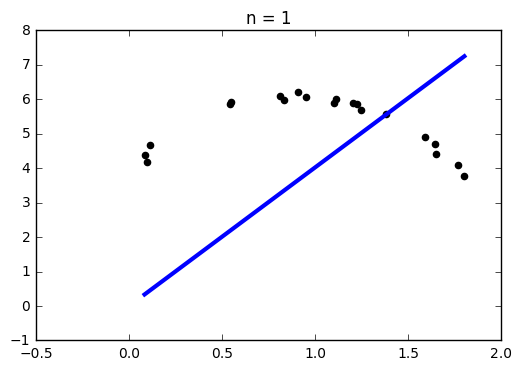

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     24.01
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           9.93e-05
Time:                        11:44:45   Log-Likelihood:                -53.822
No. Observations:                  20   AIC:                             109.6
Df Residuals:                      19   BIC:                             110.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.3678      0.483      4.900      0.0

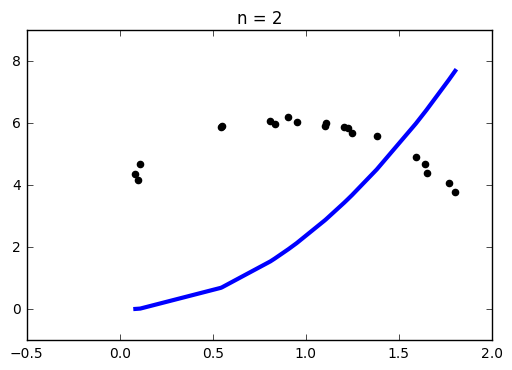

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     13.76
Date:                Wed, 26 Oct 2016   Prob (F-statistic):            0.00149
Time:                        11:44:45   Log-Likelihood:                -56.546
No. Observations:                  20   AIC:                             115.1
Df Residuals:                      19   BIC:                             116.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.2983      0.350      3.709      0.0

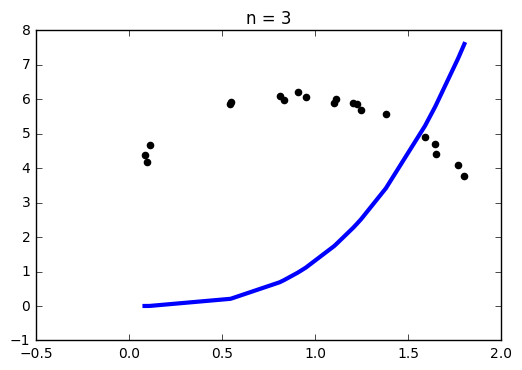

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     9.227
Date:                Wed, 26 Oct 2016   Prob (F-statistic):            0.00677
Time:                        11:44:45   Log-Likelihood:                -58.034
No. Observations:                  20   AIC:                             118.1
Df Residuals:                      19   BIC:                             119.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.6946      0.229      3.038      0.0

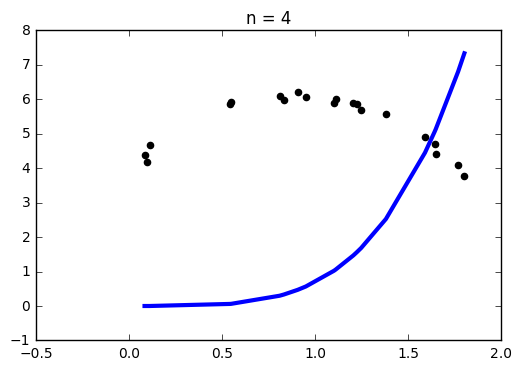

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     6.847
Date:                Wed, 26 Oct 2016   Prob (F-statistic):             0.0170
Time:                        11:44:45   Log-Likelihood:                -58.915
No. Observations:                  20   AIC:                             119.8
Df Residuals:                      19   BIC:                             120.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.3705      0.142      2.617      0.0

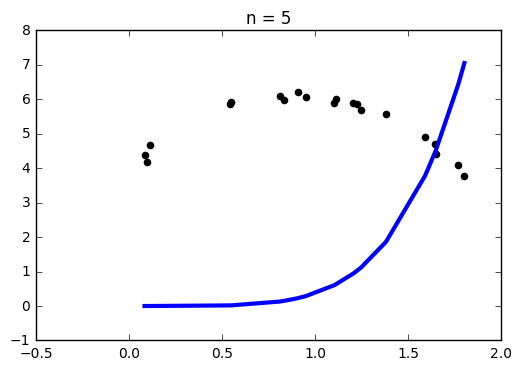

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     5.445
Date:                Wed, 26 Oct 2016   Prob (F-statistic):             0.0308
Time:                        11:44:46   Log-Likelihood:                -59.473
No. Observations:                  20   AIC:                             120.9
Df Residuals:                      19   BIC:                             121.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.1985      0.085      2.333      0.0

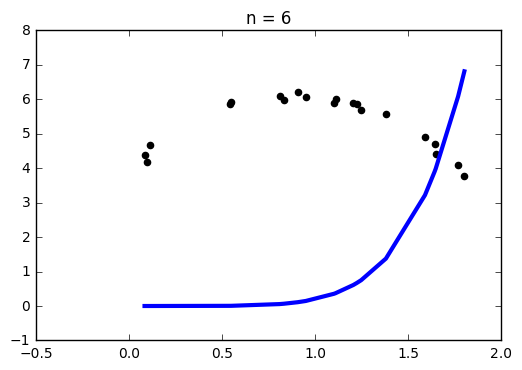

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     4.545
Date:                Wed, 26 Oct 2016   Prob (F-statistic):             0.0463
Time:                        11:44:46   Log-Likelihood:                -59.848
No. Observations:                  20   AIC:                             121.7
Df Residuals:                      19   BIC:                             122.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.1070      0.050      2.132      0.0

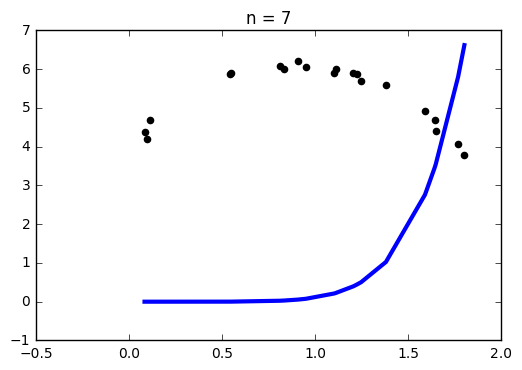

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     3.928
Date:                Wed, 26 Oct 2016   Prob (F-statistic):             0.0621
Time:                        11:44:46   Log-Likelihood:                -60.113
No. Observations:                  20   AIC:                             122.2
Df Residuals:                      19   BIC:                             123.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0580      0.029      1.982      0.0

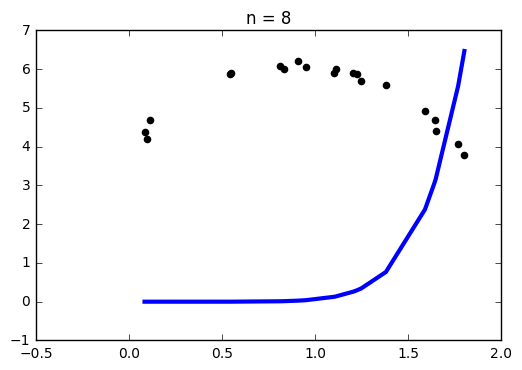

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     3.480
Date:                Wed, 26 Oct 2016   Prob (F-statistic):             0.0776
Time:                        11:44:46   Log-Likelihood:                -60.311
No. Observations:                  20   AIC:                             122.6
Df Residuals:                      19   BIC:                             123.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0316      0.017      1.865      0.0

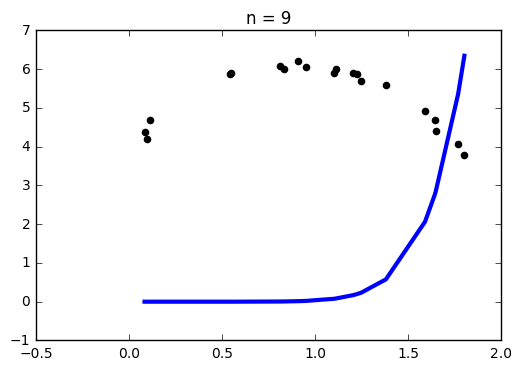

In [6]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = monomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    print(regr.summary())

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

It's important to note that the true measures of bias and variance are averaged over many fits to many samples from the same data source, and we're only looking at one instance here. Notice that the bias is at first decreasing as the exponent increases, but at $n=6$ we see the bias start to increase while the squared errors are basically unchanged. Let's make a plot of the bias as the exponent increases.

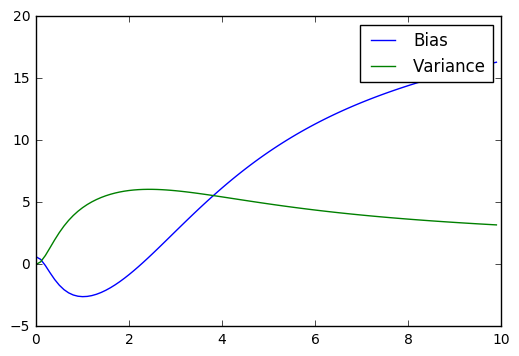

In [7]:
bs = []
vars = []
exps = np.arange(0, 10, 0.1)

for i in exps:
    X = monomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Just as in the conceptual diagram from the lesson, there's a spot where the bias is minimized around $n=1$.

# Variance

Now let's try to fit the full polynomial as the degree increases, which will help us visualize variance error.

**Check**: In the next code section, what changes when compared to the code above?

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     58.34
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           3.31e-07
Time:                        12:06:29   Log-Likelihood:                -47.954
No. Observations:                  20   AIC:                             97.91
Df Residuals:                      19   BIC:                             98.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             4.0221      0.527      7.638      0.0

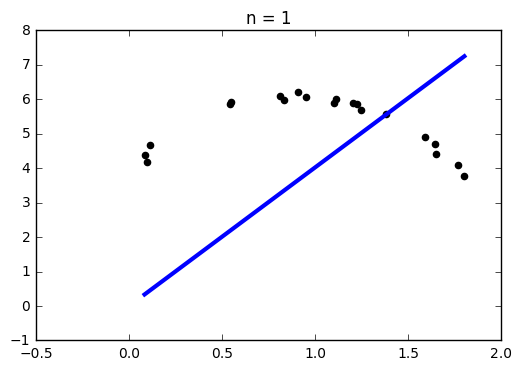

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     134.2
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           1.53e-11
Time:                        12:06:30   Log-Likelihood:                -34.325
No. Observations:                  20   AIC:                             72.65
Df Residuals:                      18   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            12.4168      1.192     10.415      0.0

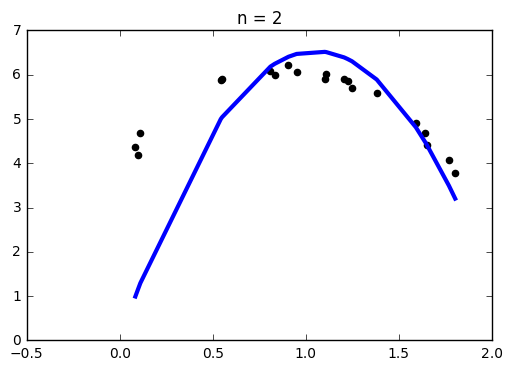

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     138.0
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           3.93e-12
Time:                        12:06:30   Log-Likelihood:                -29.667
No. Observations:                  20   AIC:                             65.33
Df Residuals:                      17   BIC:                             68.32
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            21.8907      3.137      6.978      0.0

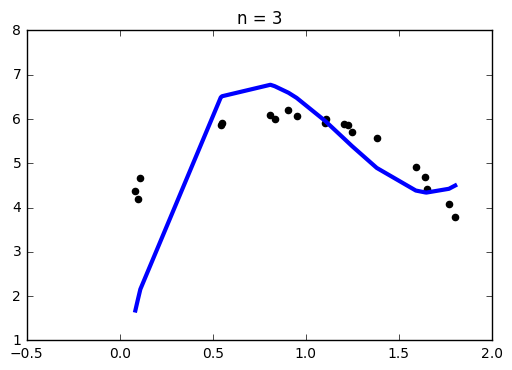

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     236.1
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           5.25e-14
Time:                        12:06:30   Log-Likelihood:                -21.043
No. Observations:                  20   AIC:                             50.09
Df Residuals:                      16   BIC:                             54.07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            39.7484      4.356      9.125      0.0

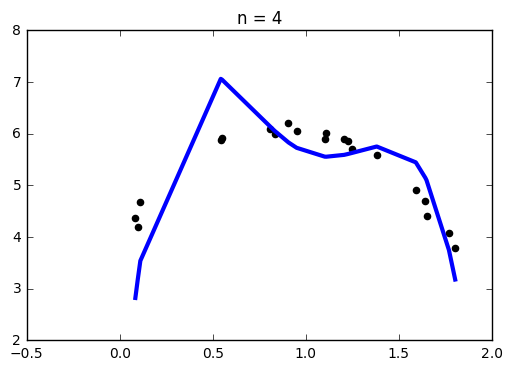

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     825.7
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           9.49e-18
Time:                        12:06:30   Log-Likelihood:                -5.7806
No. Observations:                  20   AIC:                             21.56
Df Residuals:                      15   BIC:                             26.54
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            56.4389      3.091     18.256      0.0

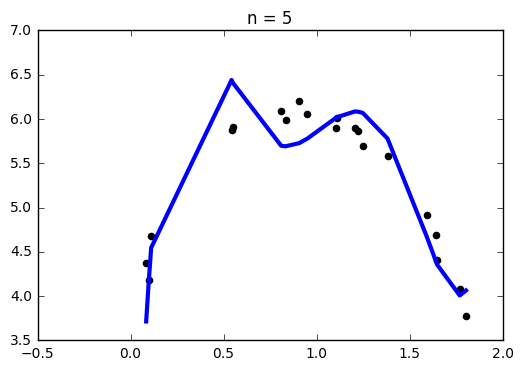

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3329.
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           2.98e-21
Time:                        12:06:30   Log-Likelihood:                 10.645
No. Observations:                  20   AIC:                            -9.290
Df Residuals:                      14   BIC:                            -3.315
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            64.6682      1.773     36.484      0.0

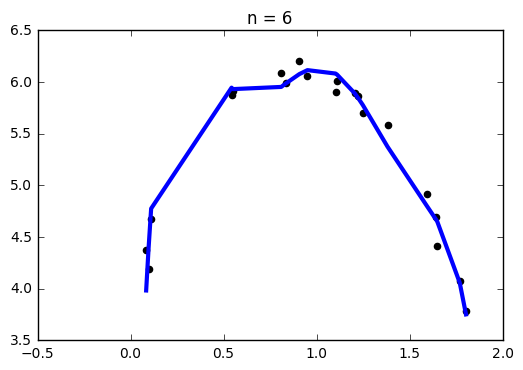

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3958.
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           1.34e-20
Time:                        12:06:31   Log-Likelihood:                 14.657
No. Observations:                  20   AIC:                            -15.31
Df Residuals:                      13   BIC:                            -8.343
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            69.1496      2.323     29.772      0.0

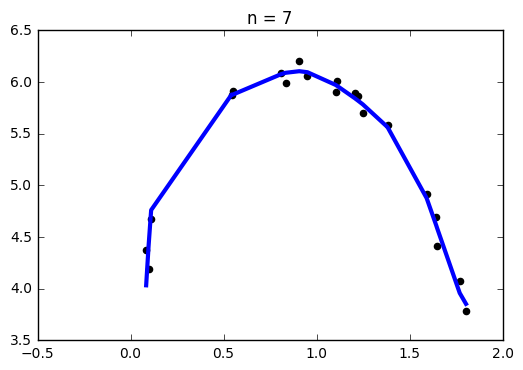

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3587.
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           4.48e-19
Time:                        12:06:31   Log-Likelihood:                 15.808
No. Observations:                  20   AIC:                            -15.62
Df Residuals:                      12   BIC:                            -7.650
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            76.7405      6.676     11.495      0.0

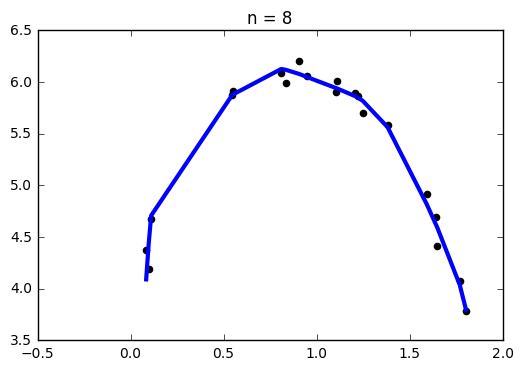

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3270.
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           1.52e-17
Time:                        12:06:31   Log-Likelihood:                 16.929
No. Observations:                  20   AIC:                            -15.86
Df Residuals:                      11   BIC:                            -6.896
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            89.9567     13.318      6.754      0.0

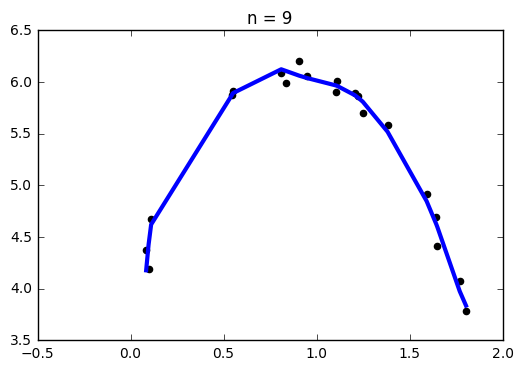

In [8]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print(regr.summary())

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

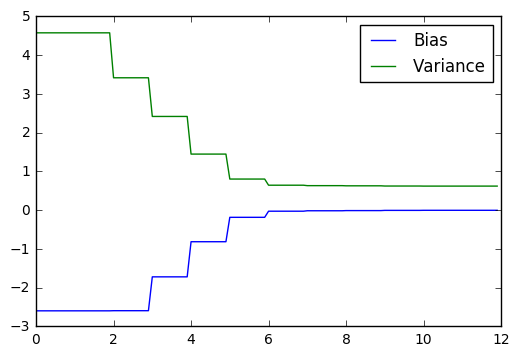

In [9]:
bs = []
vars = []
exps = np.arange(0, 12, .1)

for i in exps:
    X = polynomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Notice that the fits for $n = 2, 3, 4$ are pretty good. As the exponent increases, the best fit curve is overfitting the dataset, and the shape of the curve does not reflect what we know the underlying data to really look like. In this case we have error due to variance -- with too many parameters, our model is fitting the random variations in the data which we generally want to avoid.

# Guided Practice

We've seen that as the complexity in our models change so too do the bias and variance. Let's investigate from another angle using linear regression. Rather than change the model, we'll change the underlying data to be drawn from a higher dimensional model.

Your tasks are:
* Fill in the code to fit a linear regression to the data
* Investigate the bias and variance as the data source changes in complexity


Residual sum of squares: 0.31


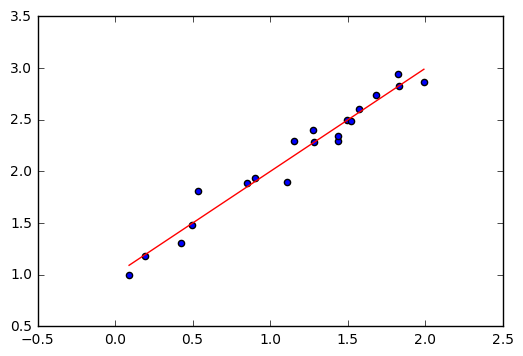

Residual sum of squares: 3.96


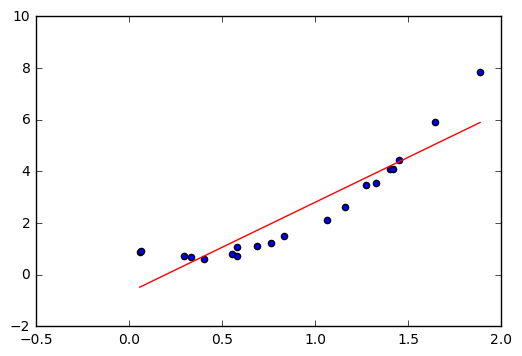

Residual sum of squares: 29.64


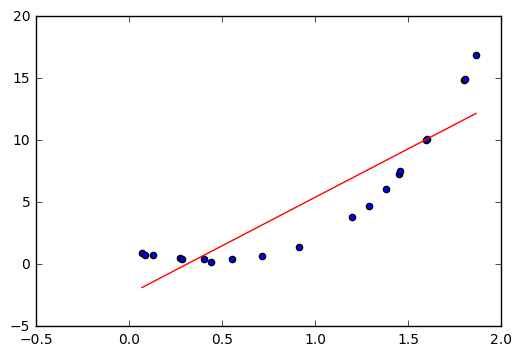

Residual sum of squares: 212.40


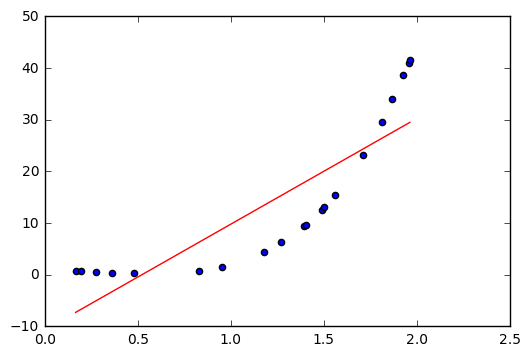

Residual sum of squares: 611.86


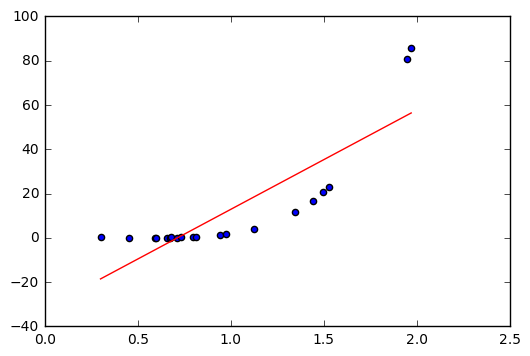

Residual sum of squares: 2049.67


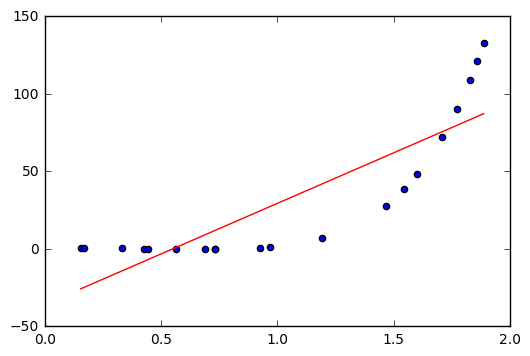

In [11]:
for degree in range(1, 7):
    # Generate some data
    f = lambda x: 1 - 2 * x + 3 * x ** degree + np.random.normal(mu, sigma)
    data = generate_data(f, 0, 2, n=20)

    domain = np.array([x[0] for x in data])
    Y = np.array([x[1] for x in data])

    X = np.array([domain]).transpose()
    # Create linear regression object
    X1 = sm.add_constant(X) # Without it intercept is excluded
    model = sm.OLS(Y, X1).fit() # OLS stands for ordinary least squares

    # Compute the errors
    yhat = model.predict(X1)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    print("Residual sum of squares: %.2f" % sse)

    # Plot outputs
    plt.scatter(X,Y)
    plt.plot(X,yhat,color="red")
    plt.show()
    

# Individual Exercises

Some functions, like $sin$ and $exp$ can be better fit with increasing large polynomials.

* By modifying the above code, fit polynomials of degree $n$ as $n$ ranges from 1 to 10 to $sin$ on the interval $[0, 2 \pi]$.
* Can you explain why the bias and variance continue to decrease as $n$ gets large?

> Answer: These functions are not polynomial in nature and can be arbitrarily well approximately with a sufficiently large polynomial.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     25.55
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           1.97e-06
Time:                        12:25:59   Log-Likelihood:                -99.385
No. Observations:                 100   AIC:                             200.8
Df Residuals:                      99   BIC:                             203.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0912      0.018     -5.055      0.0

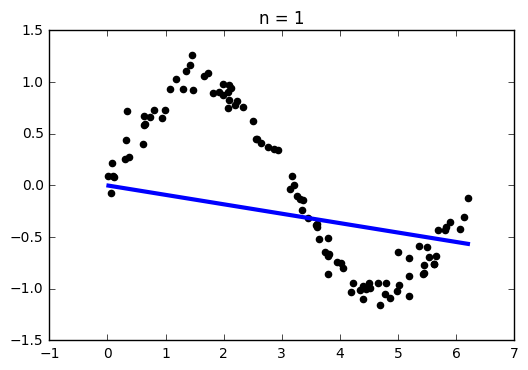

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     42.52
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           5.07e-14
Time:                        12:25:59   Log-Likelihood:                -79.629
No. Observations:                 100   AIC:                             163.3
Df Residuals:                      98   BIC:                             168.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.3236      0.062      5.219      0.0

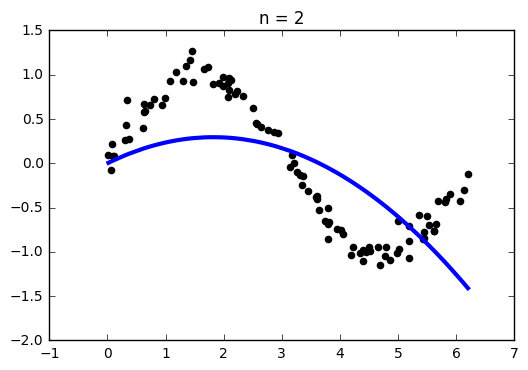

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     872.5
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           5.19e-70
Time:                        12:25:59   Log-Likelihood:                 55.718
No. Observations:                 100   AIC:                            -105.4
Df Residuals:                      97   BIC:                            -97.62
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.7150      0.041     41.761      0.0

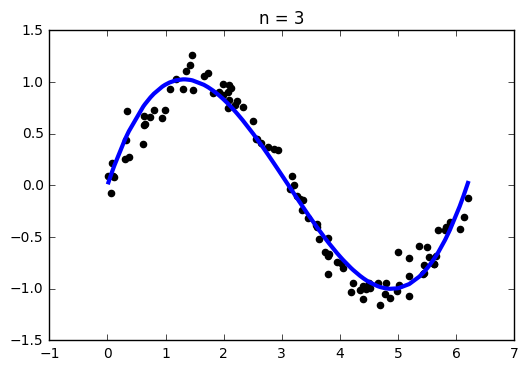

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     661.1
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           6.43e-69
Time:                        12:26:00   Log-Likelihood:                 56.712
No. Observations:                 100   AIC:                            -105.4
Df Residuals:                      96   BIC:                            -95.00
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.6153      0.083     19.555      0.0

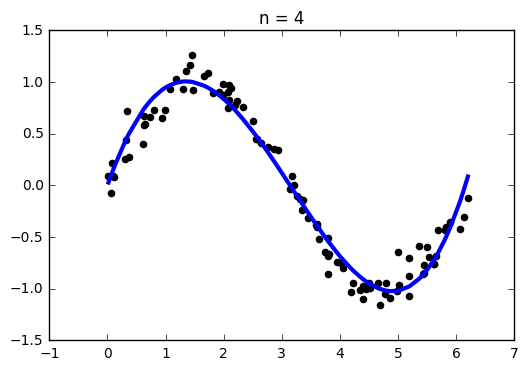

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     902.3
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           2.12e-78
Time:                        12:26:00   Log-Likelihood:                 83.201
No. Observations:                 100   AIC:                            -156.4
Df Residuals:                      95   BIC:                            -143.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8893      0.110      8.118      0.0

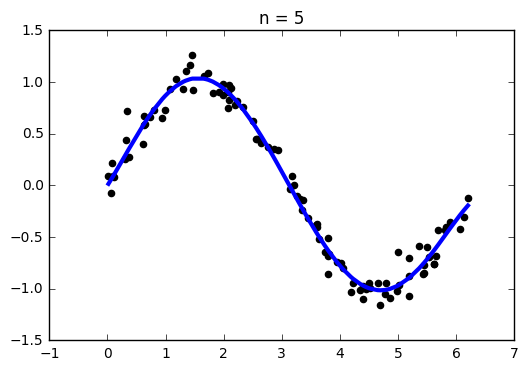

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     753.6
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           3.72e-77
Time:                        12:26:01   Log-Likelihood:                 83.831
No. Observations:                 100   AIC:                            -155.7
Df Residuals:                      94   BIC:                            -140.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.0332      0.171      6.031      0.0

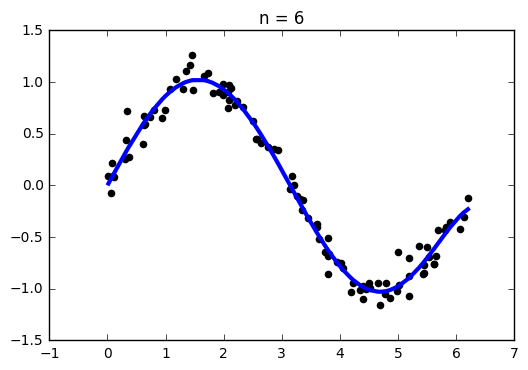

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     642.5
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           8.38e-76
Time:                        12:26:01   Log-Likelihood:                 84.091
No. Observations:                 100   AIC:                            -154.2
Df Residuals:                      93   BIC:                            -135.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.1744      0.266      4.421      0.0

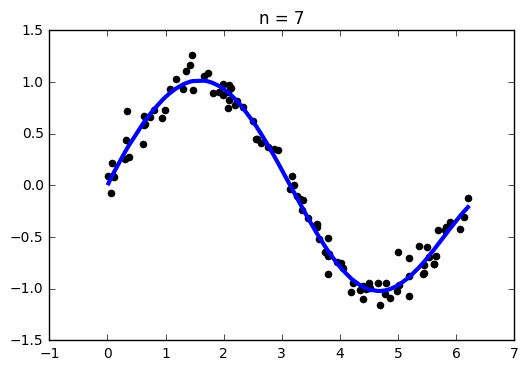

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     557.3
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           2.01e-74
Time:                        12:26:02   Log-Likelihood:                 84.192
No. Observations:                 100   AIC:                            -152.4
Df Residuals:                      92   BIC:                            -131.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.0606      0.375      2.826      0.0

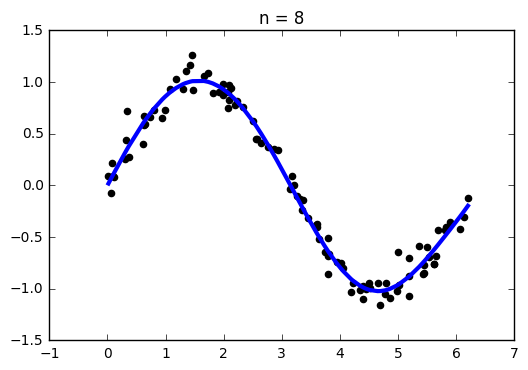

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     508.9
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           9.08e-74
Time:                        12:26:02   Log-Likelihood:                 86.051
No. Observations:                 100   AIC:                            -154.1
Df Residuals:                      91   BIC:                            -130.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.6980      0.505      3.362      0.0

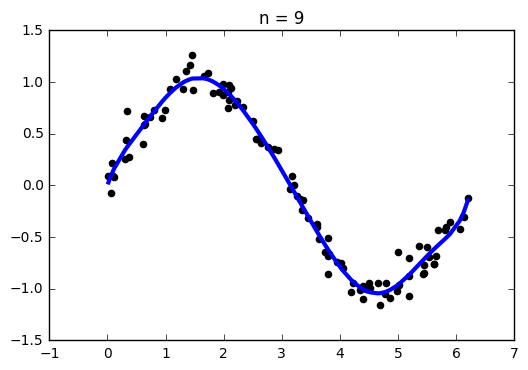

In [12]:
import math
f = lambda x: math.sin(x) + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2*3.14, n=100)

domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    print(regr.summary())

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

### Repeat the same exercise with the function

$$ y = e^x $$

You should again find that larger polynomials fit the data better.

### A bad model for the exponential

To see a model with high variance, try fitting the model:

```
y = a sin(x) + b cos(x)
```

to `y = e^x`. Does this model have more bias or variance?

> Answer: This model has high bias.